In [1]:
import sys
import numbers
import time
import math
import datetime as dt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from scipy import stats as ss
%matplotlib inline
from matplotlib import pyplot as plt
import statsmodels
import sktime
import metrics
import sklearn
from functools import reduce
import pmdarima as pmd
import statsmodels.api as sm
from scipy.stats import normaltest
import seaborn as sns
import plotly as ply
import cufflinks as cf
import chart_studio.plotly as py
import plotnine as p9
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, AutoARIMA, HoltWinters, AutoETS, AutoTheta, AutoCES

In [2]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.width', 80)
pd.set_option('display.max_columns', 12)

In [3]:
month = pd.read_csv('data/month.csv')

In [4]:
month_c = pd.read_csv('data/month_clean.csv')

In [5]:
month['ds'] = pd.to_datetime(month['ds'], format = '%Y-%m')
month_c['ds'] = pd.to_datetime(month_c['ds'], format = '%Y-%m')

In [6]:
month.describe()

,ds,alx,gco,mco
count,60,60.00,60.00,60.00
mean,2021-06-16 06:24:00,"19,421.08","72,201.92","44,447.77"
min,2019-01-01 00:00:00,"14,715.00","63,023.00","37,210.00"
25%,2020-03-24 06:00:00,"18,443.25","69,846.75","42,008.25"
50%,2021-06-16 00:00:00,"19,387.50","72,271.00","44,956.00"
75%,2022-09-08 12:00:00,"20,523.50","74,888.75","47,259.00"
max,2023-12-01 00:00:00,"23,607.00","80,154.00","50,165.00"
std,NaN,"1,817.35","3,984.88","3,326.95"


In [7]:
month_c.describe()

,ds,alx,gco,mco
count,60,60.00,60.00,60.00
mean,2021-06-16 06:24:00,"19,493.55","72,201.92","44,693.47"
min,2019-01-01 00:00:00,"15,207.00","63,023.00","38,075.00"
25%,2020-03-24 06:00:00,"18,456.25","69,846.75","42,159.50"
50%,2021-06-16 00:00:00,"19,387.50","72,271.00","44,956.00"
75%,2022-09-08 12:00:00,"20,523.50","74,888.75","47,259.00"
max,2023-12-01 00:00:00,"23,607.00","80,154.00","50,165.00"
std,NaN,"1,710.04","3,984.88","3,012.63"


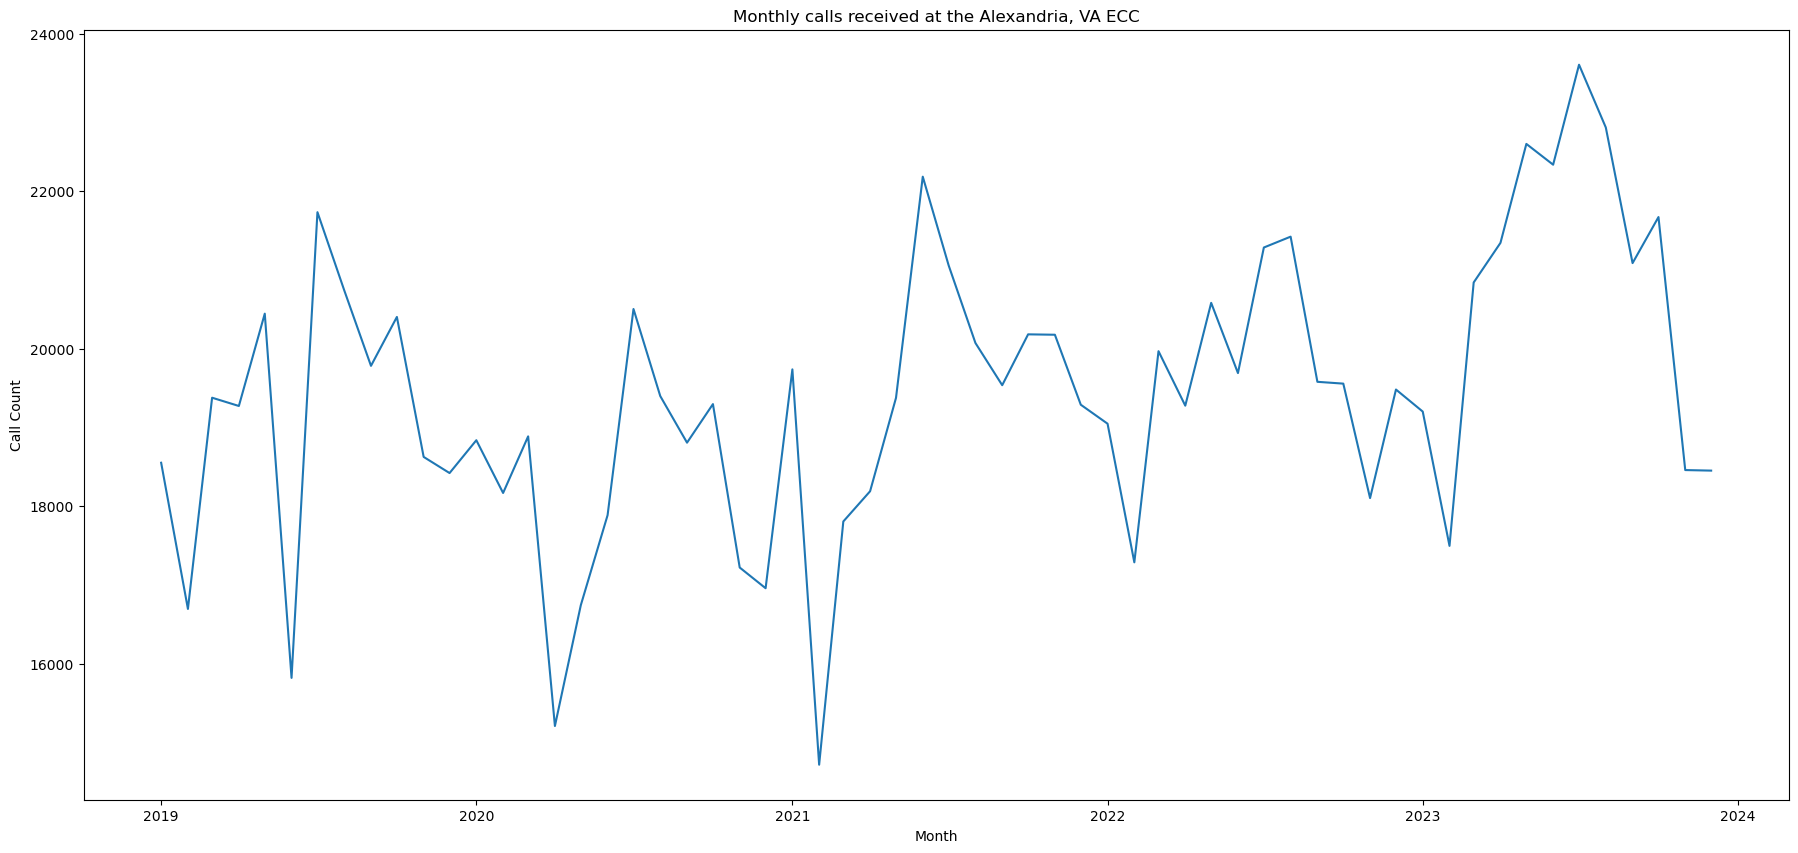

In [8]:
plt.figure(figsize=(22,10))
plt.plot(month.ds, month.alx)
plt.title("Monthly calls received at the Alexandria, VA ECC")
plt.xlabel("Month")
plt.ylabel("Call Count")
plt.show()

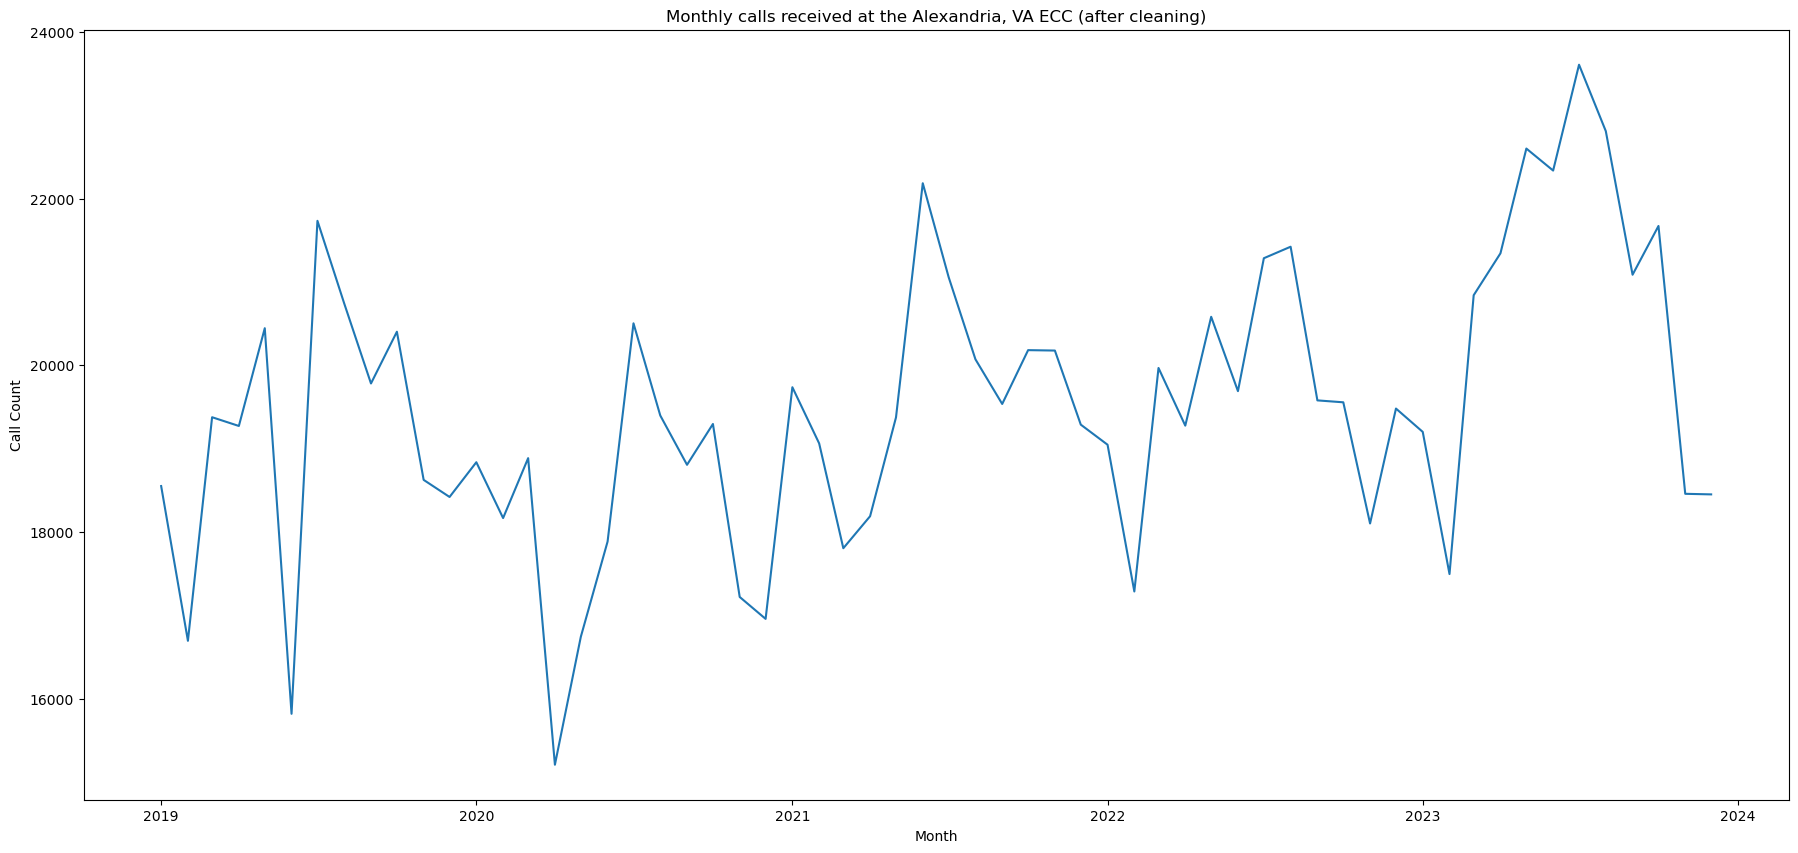

In [9]:
plt.figure(figsize=(22,10))
plt.plot(month_c.ds, month_c.alx)
plt.title("Monthly calls received at the Alexandria, VA ECC (after cleaning)")
plt.xlabel("Month")
plt.ylabel("Call Count")
plt.savefig('alxm.png', dpi=300, bbox_inches='tight')
plt.show()


In [10]:
season_alxm = seasonal_decompose(month['alx'], model='additive', period=12)

In [11]:
season_alxm2 = seasonal_decompose(month_c['alx'], model='additive', period=12)

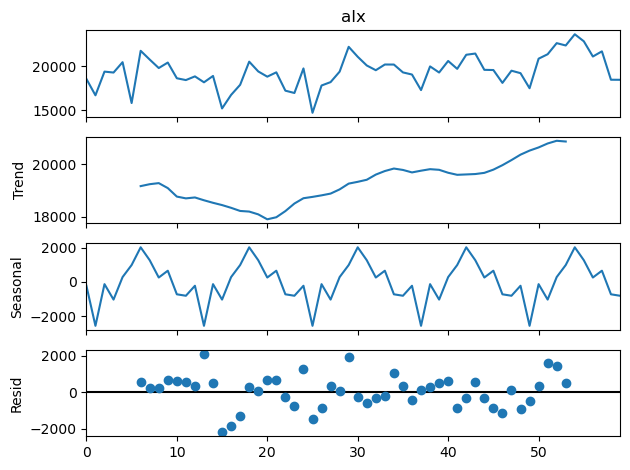

In [12]:
season_alxm.plot()
plt.show()

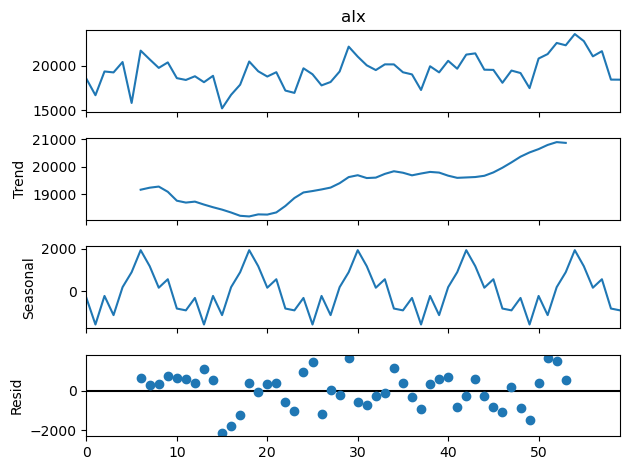

In [13]:
season_alxm2.plot()
plt.savefig('alxm_decomp.png', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
adftest_alxm = adfuller(month['alx'], autolag='AIC', regression='ct')
print("ADF Test Results")
print("Null Hypothesis: The series has a unit root (non-stationary)")
print("ADF-Statistic:", adftest_alxm[0])
print("P-Value:", adftest_alxm[1])
print("Number of lags:", adftest_alxm[2])
print("Number of observations:", adftest_alxm[3])
print("Critical Values:", adftest_alxm[4])
print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")

ADF Test Results
Null Hypothesis: The series has a unit root (non-stationary)
ADF-Statistic: -1.9784784189301332
P-Value: 0.6131068571283862
Number of lags: 9
Number of observations: 50
Critical Values: {'1%': -4.15227644, '5%': -3.5022753919999996, '10%': -3.1805110400000003}
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary


In [15]:
adftest_alxm2 = adfuller(month_c['alx'], autolag='AIC', regression='ct')
print("ADF Test Results")
print("Null Hypothesis: The series has a unit root (non-stationary)")
print("ADF-Statistic:", adftest_alxm2[0])
print("P-Value:", adftest_alxm2[1])
print("Number of lags:", adftest_alxm2[2])
print("Number of observations:", adftest_alxm2[3])
print("Critical Values:", adftest_alxm2[4])
print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")

ADF Test Results
Null Hypothesis: The series has a unit root (non-stationary)
ADF-Statistic: -4.164245613863902
P-Value: 0.005066427014131615
Number of lags: 5
Number of observations: 54
Critical Values: {'1%': -4.137020943707768, '5%': -3.4951806238886345, '10%': -3.1764196311537876}
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary


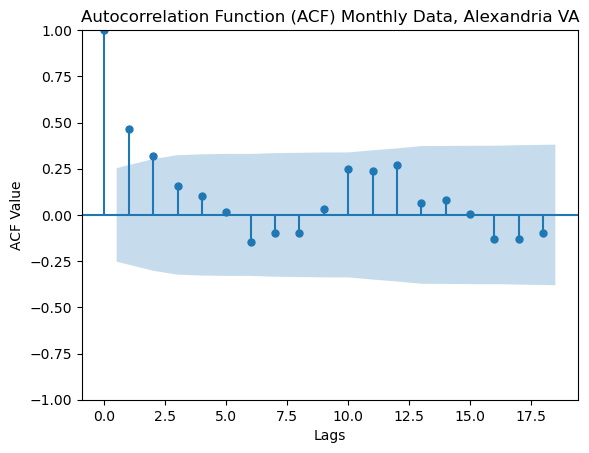

In [16]:
plot_acf(month_c['alx'])
plt.title("Autocorrelation Function (ACF) Monthly Data, Alexandria VA")
plt.xlabel("Lags")
plt.ylabel("ACF Value")
plt.show()

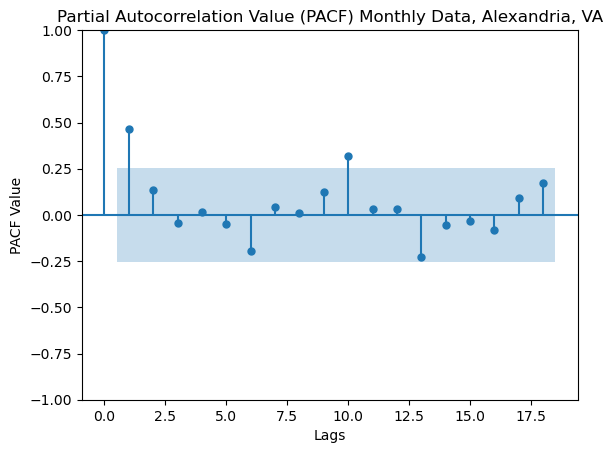

In [17]:
plot_pacf(month_c['alx'])
plt.title("Partial Autocorrelation Value (PACF) Monthly Data, Alexandria, VA")
plt.xlabel("Lags")
plt.ylabel("PACF Value")
plt.show()

In [18]:
alxm = pd.DataFrame(month_c, columns=['ds', 'alx'])

In [19]:
tr_alxm = alxm[:48]
tst_alxm = alxm[48:]

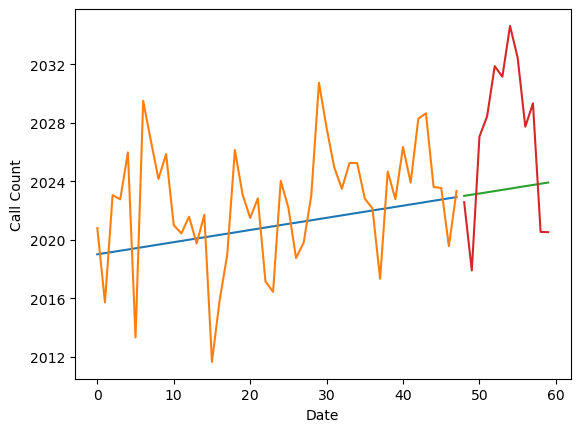

In [20]:
plt.plot(tr_alxm)
plt.plot(tst_alxm)
plt.title = ("Test and Training Split of Monthly Data for Alxeandria, VA")
plt.xlabel("Date")
plt.ylabel("Call Count")
plt.show()

In [21]:
tr_alxm_model1 = pmd.auto_arima(tr_alxm['alx'],
                      m=12,               # frequency of series
                      seasonal=True,  # TRUE if seasonal series
                      d=None,             # let model determine 'd'
                      test='adf',         # use adftest to find optimal 'd'
                      start_p=0, start_q=0, # minimum p and q
                      max_p=12, max_q=12, # maximum p and q
                      D=None,             # let model determine 'D'
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

# print model summary
print(tr_alxm_model1.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=841.742, Time=0.00 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=837.398, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=838.469, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=839.754, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=835.740, Time=0.02 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=837.458, Time=0.02 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=838.780, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=837.667, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=837.092, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=836.886, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=837.549, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=833.867, Time=0.00 sec
 ARIMA(1,1,0)(1,0,0)[12]             : AIC=835.492, Time=0.04 sec
 ARIMA(1,1,0)(0,0,1)[12]             

In [22]:
alxm_pred1 = pd.DataFrame(tr_alxm_model1.predict(n_periods=len(tst_alxm)), index=tst_alxm.index)
alxm_pred1.columns = ['predicted_volume']
alxm_pred1

,predicted_volume
48,"19,119.11"
49,"19,214.08"
50,"19,189.16"
51,"19,195.70"
52,"19,193.98"
53,"19,194.43"
54,"19,194.31"
55,"19,194.34"
56,"19,194.33"
57,"19,194.34"


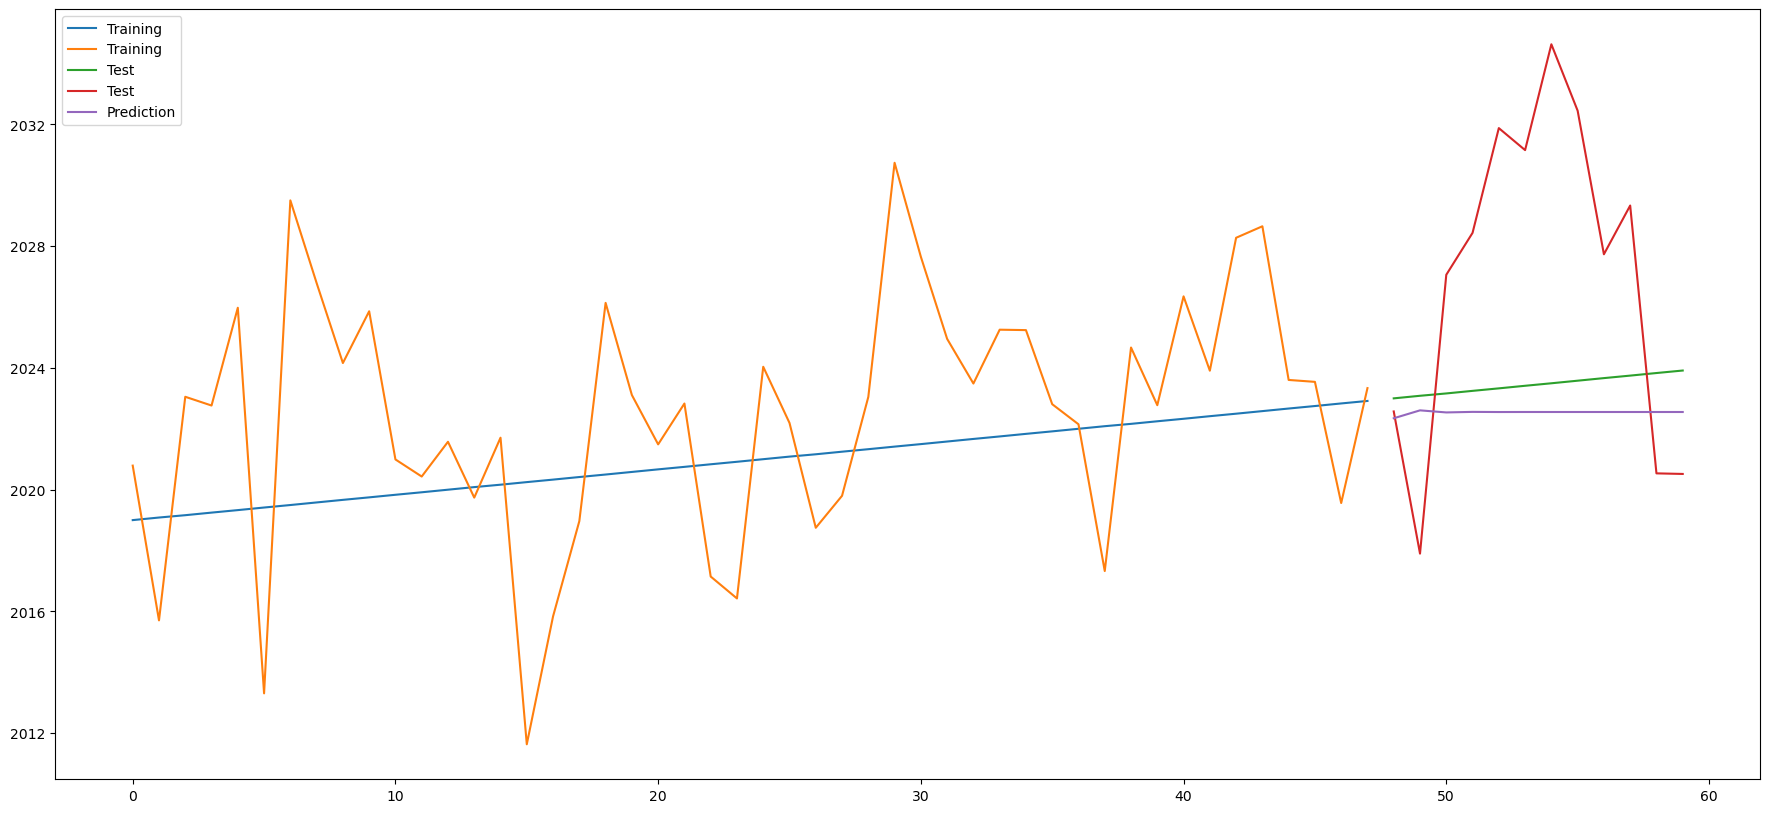

In [23]:
plt.figure(figsize=(22,10))
plt.plot(tr_alxm, label="Training")
plt.plot(tst_alxm, label = "Test")
plt.plot(alxm_pred1, label = "Prediction")
plt.legend(loc="upper left")
plt.savefig("alxm_arima.png")
plt.show()

In [24]:
alxm_mae = mean_absolute_error(tst_alxm['alx'], alxm_pred1)
alxm_mae

2169.0882155960735

In [25]:
alxm_mse = mean_squared_error(tst_alxm['alx'], alxm_pred1)
alxm_mse

6262484.125162441

In [26]:
alxm_r2 = r2_score(tst_alxm['alx'], alxm_pred1)
alxm_r2

-0.7419749995151346

In [27]:
alxm.head()

,ds,alx
0,2019-01-01,18551
1,2019-02-01,16694
2,2019-03-01,19377
3,2019-04-01,19272
4,2019-05-01,20445


In [28]:
alxm_sf = alxm

In [29]:
alxm_sf.rename(columns={'ds':'ds', 'alx':'y'}, inplace=True)

In [30]:
alxm_sf.head()

,ds,y
0,2019-01-01,18551
1,2019-02-01,16694
2,2019-03-01,19377
3,2019-04-01,19272
4,2019-05-01,20445


In [31]:
alxm_sf.insert(0, "unique_id", "M")

In [32]:
alxm_sf.head()

,unique_id,ds,y
0,M,2019-01-01,18551
1,M,2019-02-01,16694
2,M,2019-03-01,19377
3,M,2019-04-01,19272
4,M,2019-05-01,20445


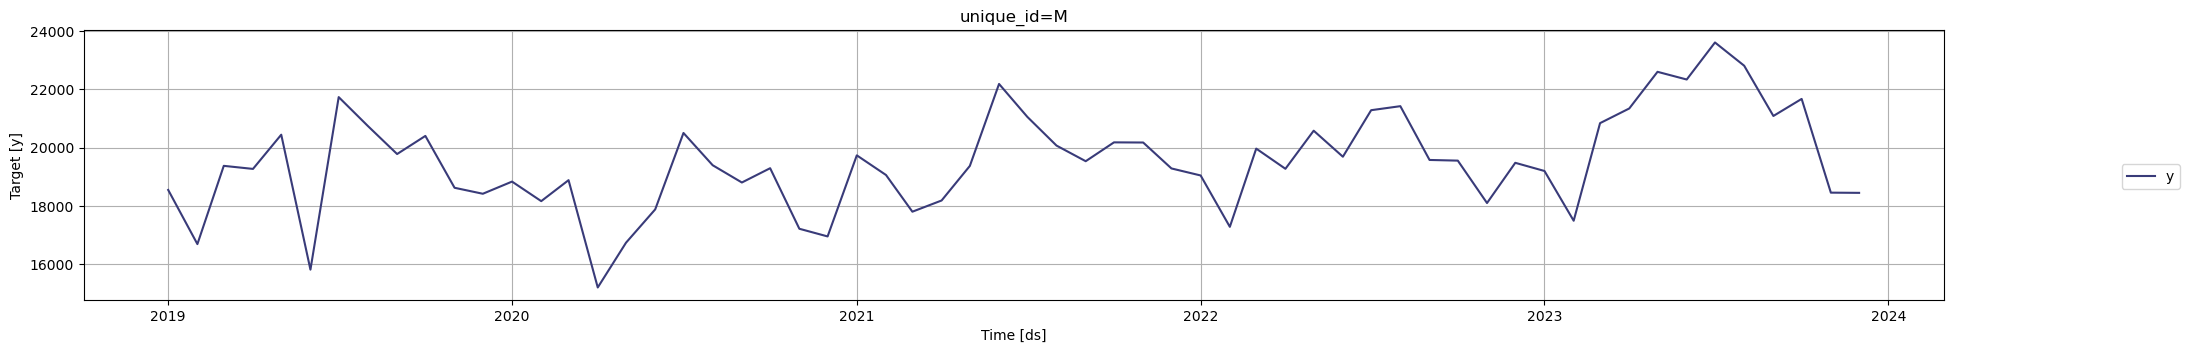

In [33]:
StatsForecast.plot(alxm_sf)

In [34]:
tr_alxm_sf = alxm_sf[:48]
tst_alxm_sf = alxm_sf[48:]

In [35]:
season_length = 12
horizon= 12

In [36]:
models = [
    AutoARIMA(season_length=season_length), # ARIMA model with automatic order selection and seasonal component
    AutoETS(season_length=season_length), # ETS model with automatic error, trend, and seasonal component
    AutoTheta(season_length=season_length), # Theta model with automatic seasonality detection
    AutoCES(season_length=season_length), # CES model with automatic seasonality detection
]

In [37]:
sf = StatsForecast(
    models=models, # models for forecasting
    freq='M',  # frequency of the data
    n_jobs=1  # number of jobs to run in parallel, -1 means using all processors
)

In [38]:
Yhat_tr_alxm_sf = sf.forecast(df=tr_alxm_sf, h=horizon)
Yhat_tr_alxm_sf.head()

,ds,AutoARIMA,AutoETS,AutoTheta,CES
unique_id,,,,,
M,2022-12-31,"15,819.23","19,161.20","19,706.49","19,619.54"
M,2023-01-31,"12,901.71","19,161.20","19,720.03","18,492.83"
M,2023-02-28,"10,537.18","19,161.20","19,733.57","19,443.67"
M,2023-03-31,"6,249.75","19,161.20","19,747.11","18,273.37"
M,2023-04-30,"6,300.72","19,161.20","19,760.65","19,606.38"


In [39]:
sf.fit(df=tr_alxm_sf) # Fit the models to the data using the fit method of the StatsForecast object

sf.fitted_ # Access fitted models from the StatsForecast object

Y_hat_alxm_sf = sf.predict(h=horizon) # Predict or forecast 'horizon' steps ahead using the predict method

Y_hat_alxm_sf.head() # Preview the first few rows of the forecasted data

,ds,AutoARIMA,AutoETS,AutoTheta,CES
unique_id,,,,,
M,2022-12-31,"15,819.23","19,161.20","19,706.49","19,619.54"
M,2023-01-31,"12,901.71","19,161.20","19,720.03","18,492.83"
M,2023-02-28,"10,537.18","19,161.20","19,733.57","19,443.67"
M,2023-03-31,"6,249.75","19,161.20","19,747.11","18,273.37"
M,2023-04-30,"6,300.72","19,161.20","19,760.65","19,606.38"


In [40]:
sn_models = [
    SeasonalNaive(season_length=12),
    HoltWinters()
]

sf_sn = StatsForecast(
    models = sn_models,
    freq = "MS",
    fallback_model = SeasonalNaive(season_length=1),
    n_jobs=-1
)

In [41]:
tr_alxm_model2 = sf_sn.forecast(df=tr_alxm_sf, h=12, level=[90,95])
tr_alxm_model2.head()

,ds,SeasonalNaive,SeasonalNaive-lo-90,SeasonalNaive-lo-95,SeasonalNaive-hi-90,SeasonalNaive-hi-95,HoltWinters,HoltWinters-lo-90,HoltWinters-lo-95,HoltWinters-hi-90,HoltWinters-hi-95
unique_id,,,,,,,,,,,
M,2023-01-01,"19,047.00","15,997.30","15,413.06","22,096.70","22,680.94","19,481.00","9,247.93","7,287.54","29,714.07","31,674.46"
M,2023-02-01,"17,286.00","14,236.30","13,652.06","20,335.70","20,919.94","19,481.00","9,247.93","7,287.54","29,714.07","31,674.46"
M,2023-03-01,"19,968.00","16,918.30","16,334.06","23,017.70","23,601.94","19,481.00","9,247.93","7,287.54","29,714.07","31,674.46"
M,2023-04-01,"19,276.00","16,226.30","15,642.06","22,325.70","22,909.94","19,481.00","9,247.93","7,287.54","29,714.07","31,674.46"
M,2023-05-01,"20,582.00","17,532.30","16,948.06","23,631.70","24,215.94","19,481.00","9,247.93","7,287.54","29,714.07","31,674.46"


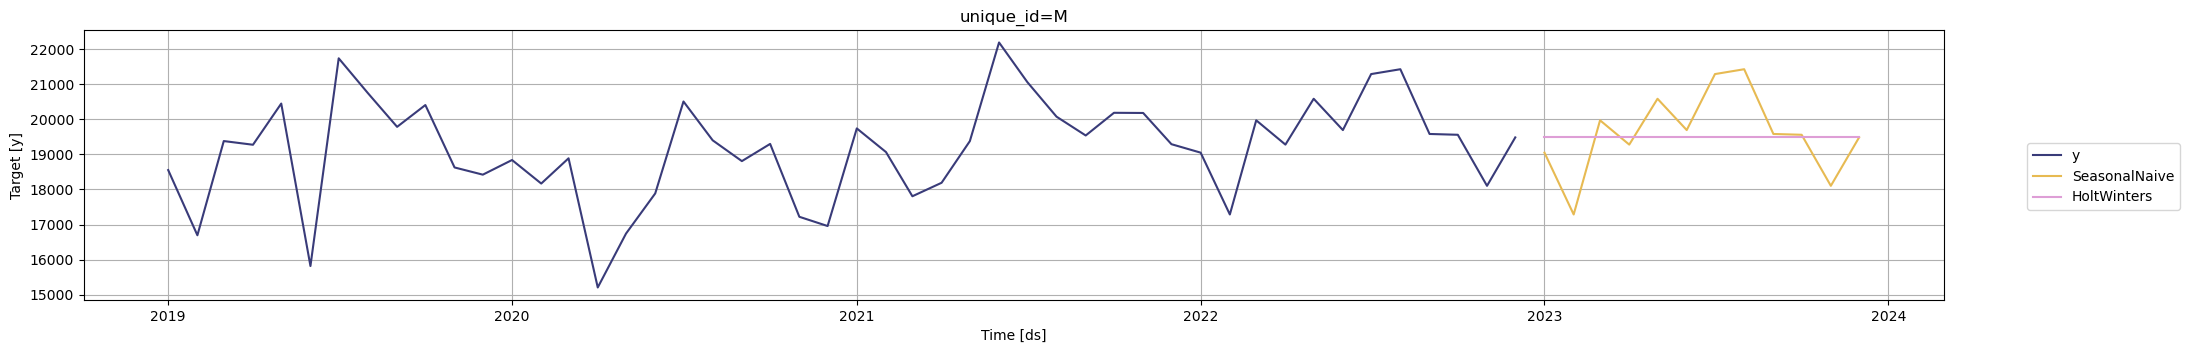

In [42]:
StatsForecast.plot(tr_alxm_sf, tr_alxm_model2)

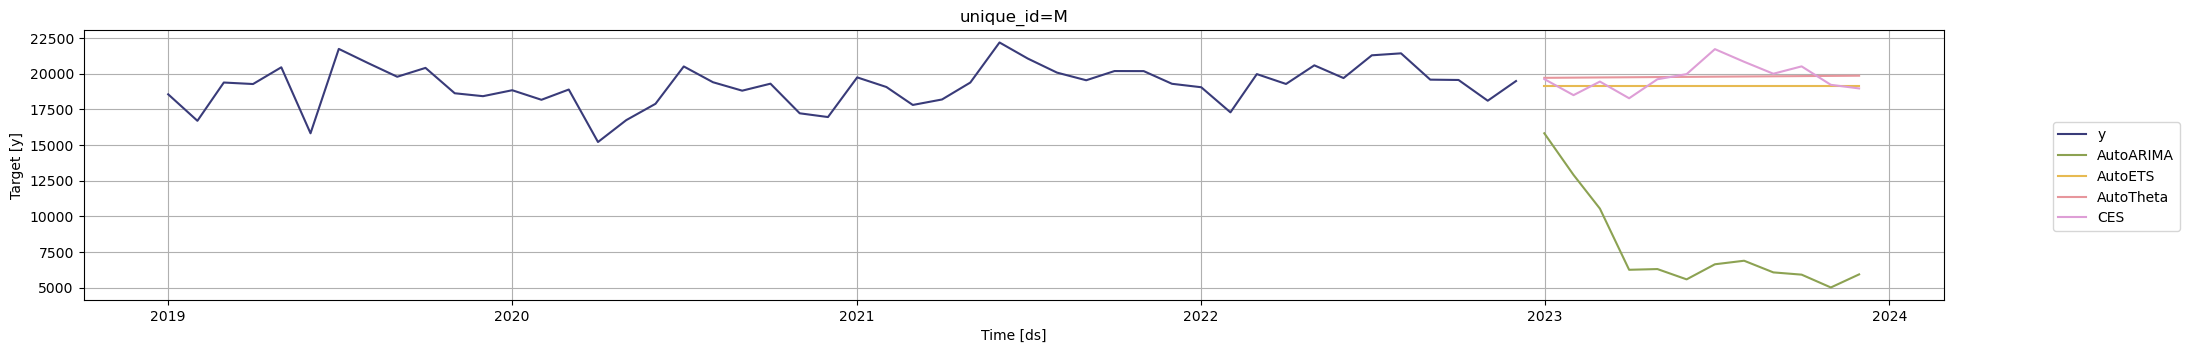

In [43]:
StatsForecast.plot(tr_alxm_sf, Yhat_tr_alxm_sf)

In [44]:
from permetrics import RegressionMetric
list_metrics = ["MSE","MAE","MedAE","MAPE", "SMAPE", "MASE", "RMSE", "R2"]

In [45]:
alxm_true = tst_alxm['alx'].tolist()
alxm_pred = alxm_pred1['predicted_volume'].tolist()

alxm_eval = RegressionMetric(alxm_true, alxm_pred)

alxm_reslist = []

for metric in list_metrics:
    alxm_reslist.append(alxm_eval.get_metric_by_name(metric))

print(alxm_reslist)

[{'MSE': 6262484.125162441}, {'MAE': 2169.0882155960735}, {'MedAE': 2020.4847338928103}, {'MAPE': 0.10029729025866112}, {'SMAPE': 0.05304175359916923}, {'MASE': 1.6262248072217018}, {'RMSE': 2502.4955794491307}, {'R2': -0.7419749995151346}]
